In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pymc3 as pm
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = fetch_california_housing(return_X_y=True)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
train_data = pd.DataFrame(X_train, columns=fetch_california_housing().feature_names)
train_data.insert(0, 'MedHouseValue', y_train)

In [3]:
rf_100 = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_100.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [4]:
metrics = pd.DataFrame(index=["MAE","MSE","RMSE","R"])
predictions = {"y_test": y_test} 
pred_df = pd.DataFrame(data=predictions)

# put new predictions into dataframe
pred_df["rf_100"] = rf_100.predict(X_test)

# put new metrics in dataframe
m_name = "rf_100"

metrics.at["MAE", m_name] = mean_absolute_error(pred_df.y_test, pred_df.rf_100)
metrics.at["MSE", m_name] = mean_squared_error(pred_df.y_test, pred_df.rf_100)
metrics.at["RMSE", m_name] = np.sqrt(mean_squared_error(pred_df.y_test, pred_df.rf_100))
metrics.at["R", m_name] = r2_score(pred_df.y_test, pred_df.rf_100)

In [5]:
rf_250 = RandomForestRegressor(n_estimators = 250, random_state = 0)
rf_250.fit(X_train, y_train)

# put new predictions into dataframe
pred_df["rf_250"] = rf_250.predict(X_test)

# put new metrics in dataframe
m_name = "rf_250"

metrics.at["MAE", m_name] = mean_absolute_error(pred_df.y_test, pred_df.rf_250)
metrics.at["MSE", m_name] = mean_squared_error(pred_df.y_test, pred_df.rf_250)
metrics.at["RMSE", m_name] = np.sqrt(mean_squared_error(pred_df.y_test, pred_df.rf_250))
metrics.at["R", m_name] = r2_score(pred_df.y_test, pred_df.rf_250)

In [6]:
rf_500 = RandomForestRegressor(n_estimators = 500, random_state = 0)
rf_500.fit(X_train, y_train)

# put new predictions into dataframe
pred_df["rf_500"] = rf_500.predict(X_test)

# put new metrics in dataframe
m_name = "rf_500"

metrics.at["MAE", m_name] = mean_absolute_error(pred_df.y_test, pred_df.rf_500)
metrics.at["MSE", m_name] = mean_squared_error(pred_df.y_test, pred_df.rf_500)
metrics.at["RMSE", m_name] = np.sqrt(mean_squared_error(pred_df.y_test, pred_df.rf_500))
metrics.at["R", m_name] = r2_score(pred_df.y_test, pred_df.rf_500)

In [7]:
rf_1000 = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rf_1000.fit(X_train, y_train)

# put new predictions into dataframe
pred_df["rf_1000"] = rf_1000.predict(X_test)

# put new metrics in dataframe
m_name = "rf_1000"

metrics.at["MAE", m_name] = mean_absolute_error(pred_df.y_test, pred_df.rf_1000)
metrics.at["MSE", m_name] = mean_squared_error(pred_df.y_test, pred_df.rf_1000)
metrics.at["RMSE", m_name] = np.sqrt(mean_squared_error(pred_df.y_test, pred_df.rf_1000))
metrics.at["R", m_name] = r2_score(pred_df.y_test, pred_df.rf_1000)

In [8]:
metrics

,rf_100,rf_250,rf_500,rf_1000
MAE,0.326648,0.325310,0.324930,0.324834
MSE,0.254972,0.252253,0.251868,0.251531
RMSE,0.504948,0.502248,0.501865,0.501529
R,0.805425,0.807500,0.807794,0.808051


<AxesSubplot: >

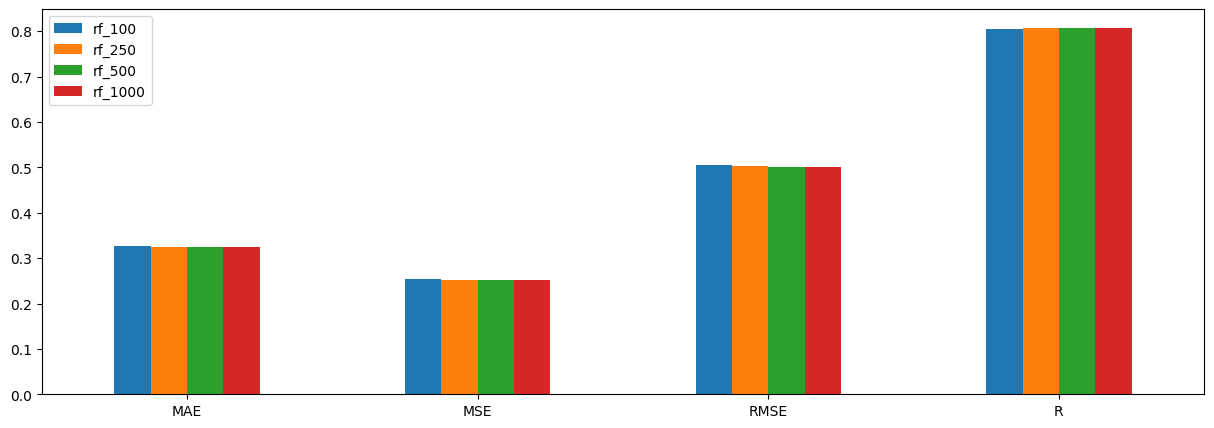

In [11]:
metrics.plot.bar(figsize=(15,5), rot=0)